In [1]:
!pip install gensim

In [2]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
legal_corpus = [
"The court ruled in favor of the plaintiff.",
"The defendant was found guilty of negligence.",
"A breach of contract case was filed.",
"The agreement between parties must be honored.",
"The lawyer presented compelling evidence.",
"Legal documents must be drafted carefully.",
"The jury deliberated for several hours.",
"A settlement was reached between the parties.",
"The plaintiff claimed damages for losses incurred.",
"The contract outlined the obligations of both parties."
]
# Preprocess the corpus
tokenized_corpus = [simple_preprocess(sentence) for sentence in legal_corpus]
  # Train the Word2Vec model
legal_word2vec = Word2Vec(
  sentences=tokenized_corpus,
  vector_size=50, # Embedding dimension
  window=3, # Context window size
  min_count=1, # Minimum word frequency
  sg=1, # Skip-gram model
  epochs=100 # Training epochs
)
# Save the model for later use
legal_word2vec.save("legal_word2vec.model")

In [6]:
# Analyze embeddings: Display vector for a specific word
word = "lawyer"
if word in legal_word2vec.wv:
  print(f"Vector embedding for'{word}':\n{legal_word2vec.wv[word]}\n")
else:
  print(f"Word '{word}' not found in the Word2Vec model.")

Vector embedding for'lawyer':
[ 0.00373483  0.01353383  0.00585796 -0.01324683  0.01500349 -0.01261986
  0.01892563  0.00698961 -0.0087639  -0.01023367 -0.00875896 -0.01318524
  0.01972703 -0.00463062  0.01525868 -0.01837575  0.0055629  -0.00126356
  0.01417167 -0.01969541  0.01564029 -0.00948072 -0.0107858  -0.01128642
 -0.00610619 -0.00604345 -0.00693252 -0.01396556  0.00086967 -0.00136903
 -0.00358557  0.00685404 -0.01432065 -0.00657563  0.00952303  0.01720192
 -0.01858611  0.01418636  0.01038651 -0.00818817  0.01832661 -0.01858529
  0.01404059  0.01154918  0.00326395 -0.01036671 -0.00841038 -0.00736812
  0.00374052  0.00413726]



In [7]:
# Visualize embeddings using PCA
words_to_visualize = ["court", "plaintiff", "defendant", "agreement",
"lawyer", "evidence", "contract", "settlement", "jury", "damages"]
word_vectors = [legal_word2vec.wv[word] for word in words_to_visualize]
word_vectors


[array([-0.01018794, -0.0037532 , -0.01479373,  0.00535417,  0.00549183,
        -0.00194653, -0.00904275, -0.00120178,  0.01239534,  0.005502  ,
        -0.01752885, -0.00888894,  0.00678894,  0.00598825, -0.01972261,
         0.01158325, -0.01438892, -0.01200779,  0.00463451, -0.01056976,
         0.00906795,  0.01991566, -0.00384839,  0.01845003,  0.00452612,
         0.02153785,  0.0106156 , -0.0164802 , -0.0075984 ,  0.01259563,
         0.01069134,  0.01610584,  0.01608272,  0.01619358, -0.02157517,
         0.00898223, -0.00762749,  0.00642556,  0.01106042,  0.00757853,
         0.01795846,  0.00227335, -0.00347768,  0.01356644, -0.00962057,
         0.00016249,  0.01841913, -0.01246461,  0.00897428, -0.01424266],
       dtype=float32),
 array([-0.01382369,  0.0011437 , -0.01449836, -0.00296123,  0.00624782,
         0.00982854,  0.00482432,  0.00674102, -0.01035763,  0.0125059 ,
        -0.01251031,  0.00691753, -0.01420641,  0.00583739, -0.01051113,
        -0.00608784, -0.002

In [8]:
# Dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)
reduced_vectors

array([[ 0.02688162, -0.00792018],
       [ 0.00493226, -0.04934309],
       [-0.00377306, -0.04936944],
       [ 0.02256997,  0.03808062],
       [-0.0355795 , -0.01066101],
       [ 0.02682294, -0.01050709],
       [ 0.01486912,  0.0443972 ],
       [ 0.04605154,  0.01166099],
       [-0.0482769 , -0.0079725 ],
       [-0.05449799,  0.0416345 ]])

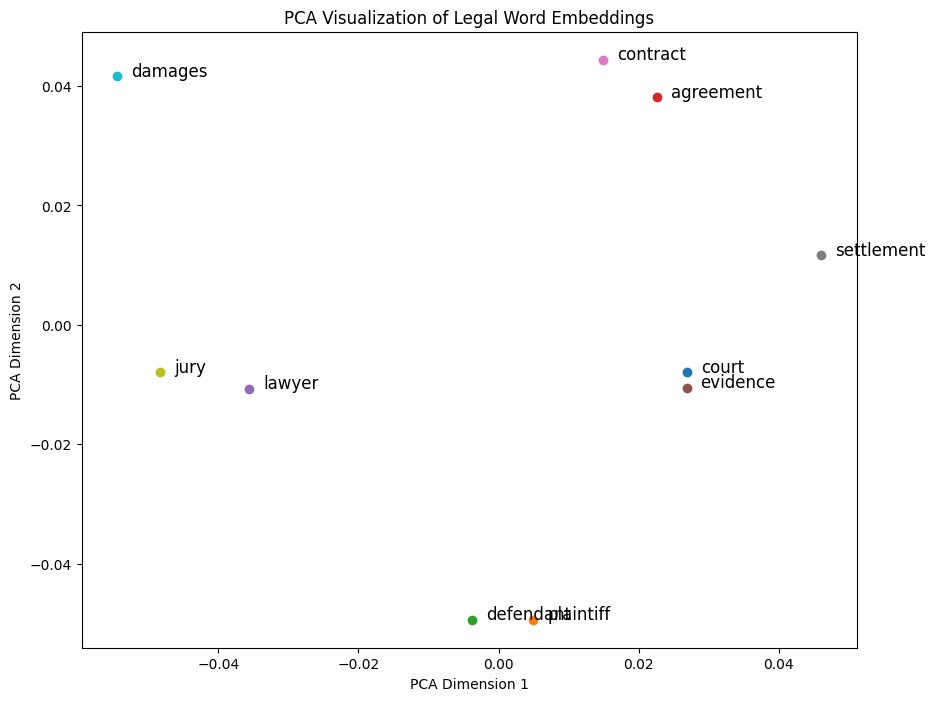

In [ ]:
# Plot embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(words_to_visualize):
  plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
  plt.text(reduced_vectors[i, 0] + 0.002, reduced_vectors[i, 1],word, fontsize=12)
plt.title("PCA Visualization of Legal Word Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()

In [10]:
# Find similar words
similar_words = legal_word2vec.wv.most_similar("lawyer", topn=5)
print(f"Words similar to 'lawyer': {similar_words}")

Words similar to 'lawyer': [('carefully', 0.29186686873435974), ('claimed', 0.27888569235801697), ('jury', 0.21892617642879486), ('damages', 0.1961500644683838), ('negligence', 0.1820133775472641)]
